In [1]:
# Import all required libraries

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [2]:
#import titanic data files

df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/MPG_Consumption.csv")

In [52]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,17,4,69,15,247,13,0,0,49
1,7,4,72,33,265,11,0,0,36
2,17,4,70,27,241,6,0,0,231
3,9,4,67,27,240,13,0,0,14
4,13,4,66,22,244,5,0,0,161
5,7,4,78,40,318,4,0,0,141
6,5,4,80,45,319,2,0,0,54
7,5,4,79,44,315,1,0,0,223
8,5,4,81,46,327,4,0,0,241
9,7,4,76,38,278,1,0,0,1


In [4]:
#Checking not null values & data types for all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
#distribution of categorical feature
df.describe(include=['O'])

,horsepower,car_name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


It shows 'Ford pinto' is the car model with highest 150 horseposer ; horsepower & car_name both have duplicate values

In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


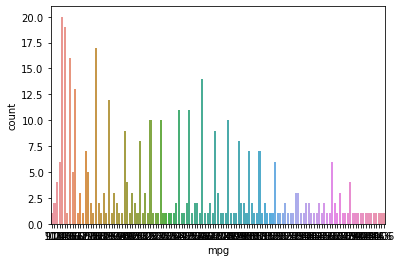

In [8]:
#Check Death count using count plot
sns.countplot(x='mpg', data=df);

In [9]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']  # need to use columns_names for pandas & for numpy use range(n) instead
    
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mpg           398 non-null    int64
 1   cylinders     398 non-null    int64
 2   displacement  398 non-null    int64
 3   horsepower    398 non-null    int32
 4   weight        398 non-null    int64
 5   acceleration  398 non-null    int64
 6   model_year    398 non-null    int64
 7   origin        398 non-null    int64
 8   car_name      398 non-null    int32
dtypes: int32(2), int64(7)
memory usage: 25.0 KB


In [11]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,17,4,69,15,247,13,0,0,49
1,7,4,72,33,265,11,0,0,36


# EDA - Analyse the data set stats using plots

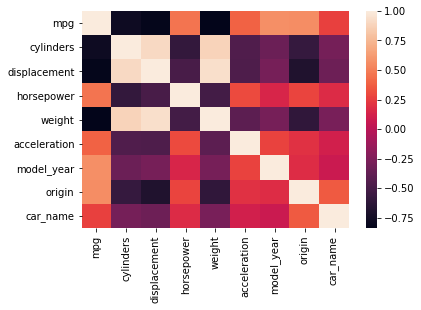

In [12]:
# checking correlation
dfcor=df.corr()
sns.heatmap(dfcor)

It shows cylinders','displacement','weight','origin','car_name' colums have correlation which impacted mpg attribute

In [14]:
# Checking for skewness for each of the column
df.skew()

mpg             0.498100
cylinders       0.277492
displacement   -0.147391
horsepower     -0.316618
weight          0.100702
acceleration    0.222112
model_year      0.011535
origin          0.923776
car_name        0.018665
dtype: float64

column origin having skewness more than 0.5,need to apply standard scaler

In [15]:
# Check for the outliers,apply zscore & remove skewness

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(398, 9)
(398, 9)


In [17]:
# Separating target & input variables
import numpy as np

df_x=df_final.drop(columns=["mpg"])
y=df_final[["mpg"]]

In [18]:
# scalling the input variable
# linear regression algorith requires all feature to be on common scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [19]:
# lets again check for skewness
x.skew()

cylinders       0.277492
displacement   -0.147391
horsepower     -0.316618
weight          0.100702
acceleration    0.222112
model_year      0.011535
origin          0.923776
car_name        0.018665
dtype: float64

# Data Visualization-Univariate

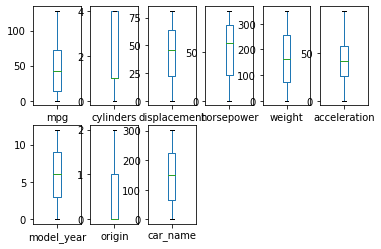

In [24]:
# Visualization - box and whisker plots - Univariate Analysis
df.plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False)
plt.show()

It shows no outliers present in data

# Data Visualization-Multivariate

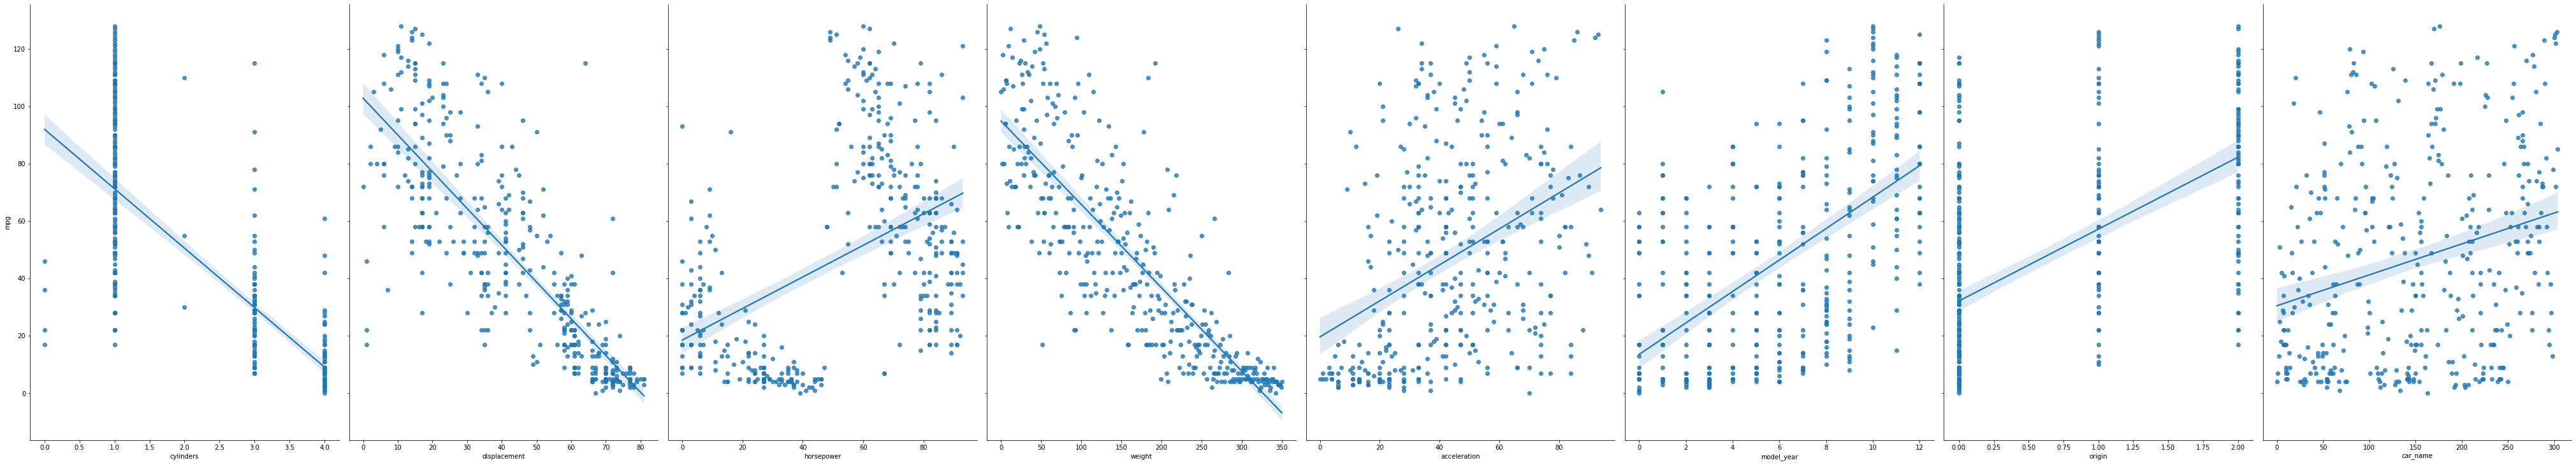

In [27]:
# draw Scatter plot for linear regression
# Column names hgaving strong relation - Cement , Superplasticizer , Age
sns.pairplot(df, x_vars=['cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'], y_vars='mpg', size=10, aspect=0.7, kind='reg')
plt.show()

This plot shows columns 'cylinders','displacement','weight' have negative linear relationship & rest have positive relationship ,hence linear regression model can be applied based on the above graph.

# Preparing X & Y for Regression model -

In [41]:
import pandas as pd
x = df[['horsepower','acceleration','model_year','origin','car_name']]

x = df[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']]

y = df.mpg        # y is a vector, hence we use dot to access 'label'

In [42]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(398, 8)


In [43]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(398,)


# Apply Linear Regression Model-

In [44]:
# Split data using train_test_split method

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 45,test_size=0.20)

In [45]:
# Interpreting model coefficients
# print the intercept and coefficients

# Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

64.14742209823386
[ 2.93089711 -0.2855093   0.04785088 -0.21845227 -0.03345683  3.65749579
  0.83187158  0.01043212]


In [46]:
# make predictions on the testing set
y_pred = linreg.predict(x_test)

In [47]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  10.830760570714201
Mean Sqr Error:    172.1802609659364
Root mean sqr error:  13.121747633830504


In [48]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_rscore=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.25)
    regrn = linear_model.LinearRegression()
    regrn.fit(x_train,y_train)
    y_pred = regrn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 49  is  0.876935177599317


In [49]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8180687775776335
0.5582946397624177
0.6214119308729811


In [50]:
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(x_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear regression: {0:.2f} %".format(100 * score))

Test score for linear regression: 85.36 %


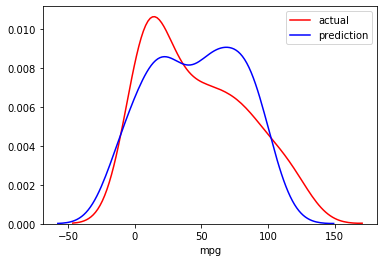

In [51]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

Conclusion-This model shows that r2 score for linear model is 87% & Test score for 85%.
Predicted Visualization shows difference as above